In [3]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    #dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    #rt = dm_return(DM = DM_stat, p_value = p_value)
    
    #return rt
    
    return DM_stat


In [2]:
lstm = open("pred-lstm.txt")
arima = open("pred-arima.txt")
real = open("pred-real.txt")
gru = open("pred-gru.txt")
svm = open("pred-svm.txt")
trans = open("pred-trans.txt")

a = lstm.readline()
b = arima.readline()
c = real.readline()
d = gru.readline()
e = svm.readline()
f = trans.readline()

lstm = []
arima = []
real = []
gru = []
svm = []
trans = []


for i in a.split(','):
    lstm.append(float(i))
    
for i in b.split(','):
    arima.append(float(i))

for i in c.split(','):
    real.append(float(i))
    
for i in d.split(','):
    gru.append(float(i))
    
for i in e.split(','):
    svm.append(float(i))
    
for i in f.split(','):
    trans.append(float(i))
    
arima.pop()
arima.pop()

real.pop()
real.pop()

svm.pop()


print(len(lstm))
print(len(arima))
print(len(real))
print(len(gru))
print(len(svm))
print(len(trans))

2534
1030
1030
1030
1030


In [16]:
#'ARIMA', 'LSTM', 'GRU', 'Transformer', 'SVM'
import numpy as np

results_mad = [[np.nan,0, 0, 0 ,0], [0,np.nan,0,0,0], [0, 0, np.nan, 0,0], [0,0,0,np.nan,0],[0,0,0,0,np.nan]]
results_mse = [[np.nan, 12, 5, 2 ,5], [15,np.nan,9,10,5], [10, 8, np.nan, 5,5], [12,15,8,np.nan,5],[12,15,8,5,np.nan]]
results_poly = [[np.nan, 12, 5, 2 ,5], [15,np.nan,9,10,5], [10, 8, np.nan, 5,5], [12,15,8,np.nan,5],[12,15,8,5,np.nan]]



results_mad[0][1] = dm_test(real,arima,lstm,h = 1, crit="MAD")
results_mad[0][1] = dm_test(real,arima,lstm,h = 1, crit="MSE")
results_poly[0][1] = dm_test(real,arima,lstm,h = 1, crit="poly", power=4)

results_mad[0][2] = dm_test(real,arima,gru,h = 1, crit="MAD")
results_mad[0][2] = dm_test(real,arima,gru,h = 1, crit="MSE")
results_poly[0][2] = dm_test(real,arima,gru,h = 1, crit="poly", power=4)

results_mad[0][4] = dm_test(real,arima,svm,h = 1, crit="MAD")
results_mad[0][4] = dm_test(real,arima,svm,h = 1, crit="MSE")
results_poly[0][4] = dm_test(real,arima,svm,h = 1, crit="poly", power=4)

results_mad[1][0] = dm_test(real,lstm,arima,h = 1, crit="MAD")
results_mad[1][0] = dm_test(real,lstm,arima,h = 1, crit="MSE")
results_poly[1][0] = dm_test(real,lstm,arima,h = 1, crit="poly", power=4)

results_mad[1][2] = dm_test(real,lstm,gru,h = 1, crit="MAD")
results_mad[1][2] = dm_test(real,lstm,gru,h = 1, crit="MSE")
results_poly[1][2] = dm_test(real,lstm,gru,h = 1, crit="poly", power=4)

results_mad[1][4] = dm_test(real,lstm,svm,h = 1, crit="MAD")
results_mad[1][4] = dm_test(real,lstm,svm,h = 1, crit="MSE")
results_poly[1][4] = dm_test(real,lstm,svm,h = 1, crit="poly", power=4)

results_mad[2][0] = dm_test(real,gru,arima,h = 1, crit="MAD")
results_mad[2][0] = dm_test(real,gru,arima,h = 1, crit="MSE")
results_poly[2][0] = dm_test(real,gru,arima,h = 1, crit="poly", power=4)

results_mad[2][1] = dm_test(real,gru,lstm,h = 1, crit="MAD")
results_mad[2][1] = dm_test(real,gru,lstm,h = 1, crit="MSE")
results_poly[2][1] = dm_test(real,gru,lstm,h = 1, crit="poly", power=4)

results_mad[2][4] = dm_test(real,gru,svm,h = 1, crit="MAD")
results_mad[2][4] = dm_test(real,gru,svm,h = 1, crit="MSE")
results_poly[2][4] = dm_test(real,gru,svm,h = 1, crit="poly", power=4)

results_mad[4][0] = dm_test(real,svm,arima,h = 1, crit="MAD")
results_mad[4][0] = dm_test(real,svm,arima,h = 1, crit="MSE")
results_poly[4][0] = dm_test(real,svm,arima,h = 1, crit="poly", power=4)

results_mad[4][1] = dm_test(real,svm,lstm,h = 1, crit="MAD")
results_mad[4][1] = dm_test(real,svm,lstm,h = 1, crit="MSE")
results_poly[4][1] = dm_test(real,svm,lstm,h = 1, crit="poly", power=4)

results_mad[4][2] = dm_test(real,svm,gru,h = 1, crit="MAD")
results_mad[4][2] = dm_test(real,svm,gru,h = 1, crit="MSE")
results_poly[4][2] = dm_test(real,svm,gru,h = 1, crit="poly", power=4)


print(results_mad)


[[nan, -5.6273534590342615, 2.116694032459646, 0, -23.762952033250215], [5.6273534590342615, nan, 7.189370056623774, 0, -23.72306468190725], [-2.116694032459646, -7.189370056623774, nan, 0, -23.778980680735494], [0, 0, 0, nan, 0], [23.762952033250215, 23.72306468190725, 23.778980680735494, 0, nan]]


(5.5, -0.5)

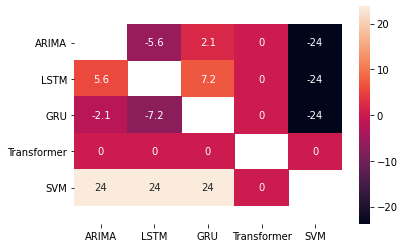

In [17]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['ARIMA', 'LSTM', 'GRU', 'Transformer', 'SVM']
Cols = ['ARIMA', 'LSTM', 'GRU', 'Transformer', 'SVM']
df = DataFrame(results_mad, index=Index, columns=Cols)

        



ax = sns.heatmap(df, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)